# Analisis Exploratorio de conjuntos de Datos reales

### Dataset: Credit Card Fraud Detection
**Link:https://www.kaggle.com/c/ieee-fraud-detection/overview**


### Caracteristicas:

**TransactionID**: Identificador de la transaccion(numericos).

**TransactionDT**: TimeDelta de una fecha y hora de referencia(el dataset es de 6 meses de datos y el timedelta parece ser segurndos por dia por eso empieza en 86400 que es 1 dia en segundos y acaba en 183 dias)(numericos).

**TransactionAmt**: Monto de la transaccion en USD(numericos).

**ProductCD**: Codigo de producto(W,C,Other).

**card1,card2,card3,card4,card5,card6**: Informacion de la tarjeta de pago,tipo,categoria,pais,etc(numericos algunos).

**addr1,addr2**: direccion de region y pais de facturacion(donde se hace la compra)(numericos)

**dist1,dist2**: distancia(numericos)

**P_emaildomain,R_emaildomain**: Dominio del correo electronico, del comprador(purchaser) y del destinatario(recipient).

**M1,M2,M3,M4,M5,M6,M7,M8,M9**: Match,coincidencias como nombre de la tarjeta y direccion(categoricos).

**C1,..,C14**: Counting,como cantidad de direcciones asociadas a la tarjeta de pago,etc(numericos).

**D1,..,D15**: TimeDelta como dias entre transacciones anteriores(numericos).

**V1,..,V399**: Vesta variables, como clasificacion, conteo y otras relaciones entre entidades(numericos).

**isFraud**: Tarjet, variable objetivo.

**Consideraciones:**

-No solo contiene transferencia de dinero sino tambien compra de regalos(como reservas de hoteles) por eso la doble direccion de correo y algunas no tiene R_emaildomain porque no son para nadie.

-Los codigos de productos no son necesariamente fisicos tambien pueden ser servicios.

-Las direcciones son del comprador el addr1=region de facturacion , addr2=pais de facturacion

-Las variables V tienen informacion como: Por ejemplo, cuántas veces apareció la tarjeta de pago asociada con una IP y un correo electrónico o dirección en un rango de tiempo de 24 horas,Todas las características de Vesta se derivaron como numéricas. Algunas de ellas son recuentos de órdenes dentro de una agrupación, un período de tiempo o condición, por lo que el valor es finito y tiene orden (o clasificación). No recomendaría tratar ninguna de ellas. como categórico. Si alguno de ellos resultó en binario por casualidad, tal vez valga la pena intentarlo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [2]:
#Lectura de los datos del archivo csv
data = pd.read_csv('Data/credit_dataset_2_transaccion.csv');


#Lectura de los datos del archivo csv
ident = pd.read_csv('Data/credit_dataset_2_identity.csv');

In [3]:
data.head(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Seleccionar columnas numéricas
numeric_columns = data.select_dtypes(include=[np.number]).columns
print("Columnas numéricas:")
print(numeric_columns)
print(f"Total de columnas numéricas: {len(numeric_columns)}")

# Seleccionar columnas categóricas
categorical_columns = data.select_dtypes(include=['object']).columns
print("\nColumnas categóricas:")
print(categorical_columns)
print(f"Total de columnas categóricas: {len(categorical_columns)}")

Columnas numéricas:
Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'card1',
       'card2', 'card3', 'card5', 'addr1', 'addr2',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=380)
Total de columnas numéricas: 380

Columnas categóricas:
Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9'],
      dtype='object')
Total de columnas categóricas: 14


In [22]:
from sklearn.manifold import TSNE

x = np.array(data[numeric_columns].iloc[:20000, :].drop(columns=['isFraud']).fillna(data[numeric_columns].mean()))
y = np.array(data['isFraud'].iloc[:20000])



model=TSNE(n_iter=2000,random_state=42,n_components=2)

In [23]:
x_2d=model.fit_transform(x)
x_2d.shape

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_core

(20000, 2)

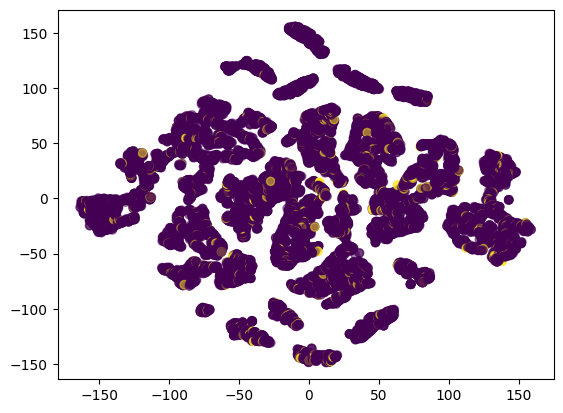

In [25]:
plt.scatter(x_2d[:,0],x_2d[:,1],c=y,alpha=0.5)

In [14]:
for col, values in data.items():
    num_uniques = values.nunique()
    print ('{name}: {num_unique}'.format(name=col, num_unique=num_uniques))
    print (values.unique())
    print ('\n')

TransactionID: 590540
[2987000 2987001 2987002 ... 3577537 3577538 3577539]


isFraud: 2
[0 1]


TransactionDT: 573349
[   86400    86401    86469 ... 15811079 15811088 15811131]


TransactionAmt: 20902
[  68.5    29.     59.   ...  557.54 1659.95  400.78]


ProductCD: 5
['W' 'H' 'C' 'S' 'R']


card1: 13553
[13926  2755  4663 ... 13166  8767 18038]


card2: 500
[ nan 404. 490. 567. 514. 555. 360. 100. 111. 352. 375. 418. 303. 314.
 543. 583. 148. 321. 269. 361. 272. 399. 569. 453. 417. 512. 545. 266.
 114. 481. 452. 547. 383. 170. 343. 556. 285. 562. 302. 264. 558. 500.
 396. 103. 206. 143. 243. 476. 199. 174. 423. 446. 492. 523. 440. 528.
 161. 535. 354. 117. 455. 325. 158. 268. 122. 479. 147. 215. 480. 265.
 388. 408. 309. 415. 414. 437. 104. 225. 101. 134. 586. 191. 491. 369.
 322. 494. 532. 313. 474. 324. 475. 298. 429. 432. 553. 566. 599. 296.
 251. 310. 242. 204. 250. 270. 346. 316. 194. 587. 390. 135. 536. 254.
 226. 327. 420. 260. 413. 428. 561. 387. 411. 392. 203. 297. 136. 27

Analisis variable Tarjet

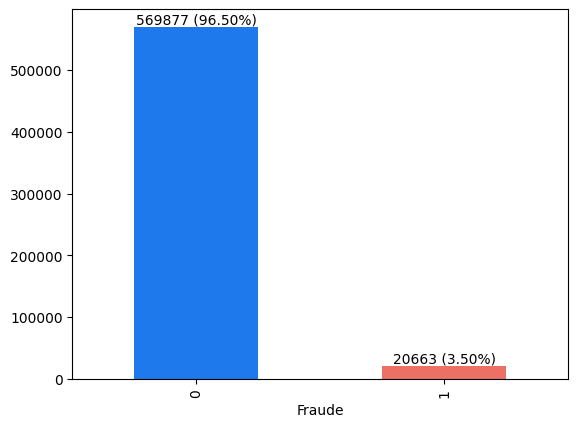

isFraud
0    569877
1     20663
Name: count, dtype: int64


In [8]:
fraud_counts = data.isFraud.value_counts()
fraud_counts.plot(kind='bar', color=['#1e79ed', '#ec7063'],xlabel="Fraude")

# Adding the counts and percentages on top of the bars
total = fraud_counts.sum()
for i, count in enumerate(fraud_counts):
    percentage = (count / total) * 100
    plt.text(i, count, f'{count} ({percentage:.2f}%)', ha='center', va='bottom')

plt.show()

fraudes=data.isFraud.value_counts()
print(fraudes)

Analisis de las caracteristicas

In [9]:
columasInteres=data[['TransactionDT','TransactionAmt','card4','card6','P_emaildomain','R_emaildomain','addr1','addr2','dist1','dist2','isFraud']]
print(columasInteres.describe())

       TransactionDT  TransactionAmt          addr1          addr2  \
count   5.905400e+05   590540.000000  524834.000000  524834.000000   
mean    7.372311e+06      135.027176     290.733794      86.800630   
std     4.617224e+06      239.162522     101.741072       2.690623   
min     8.640000e+04        0.251000     100.000000      10.000000   
25%     3.027058e+06       43.321000     204.000000      87.000000   
50%     7.306528e+06       68.769000     299.000000      87.000000   
75%     1.124662e+07      125.000000     330.000000      87.000000   
max     1.581113e+07    31937.391000     540.000000     102.000000   

               dist1         dist2        isFraud  
count  238269.000000  37627.000000  590540.000000  
mean      118.502180    231.855423       0.034990  
std       371.872026    529.053494       0.183755  
min         0.000000      0.000000       0.000000  
25%         3.000000      7.000000       0.000000  
50%         8.000000     37.000000       0.000000  
75%  

C:\Users\USER\AppData\Local\Temp\ipykernel_21068\2269065572.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraudulent_transactions['TransactionDay'] = fraudulent_transactions['TransactionDT'] // (24 * 60 * 60)


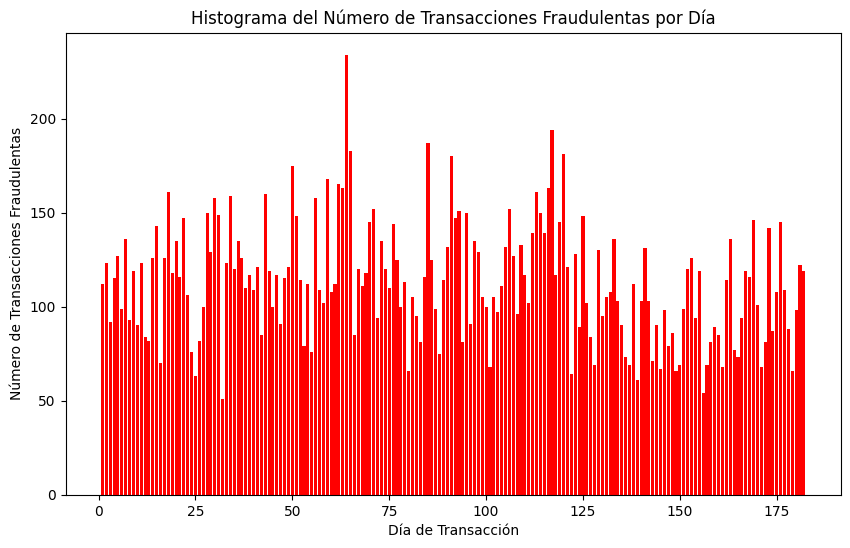

C:\Users\USER\AppData\Local\Temp\ipykernel_21068\2269065572.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_fraudulent_transactions['TransactionDay'] = non_fraudulent_transactions['TransactionDT'] // (24 * 60 * 60)


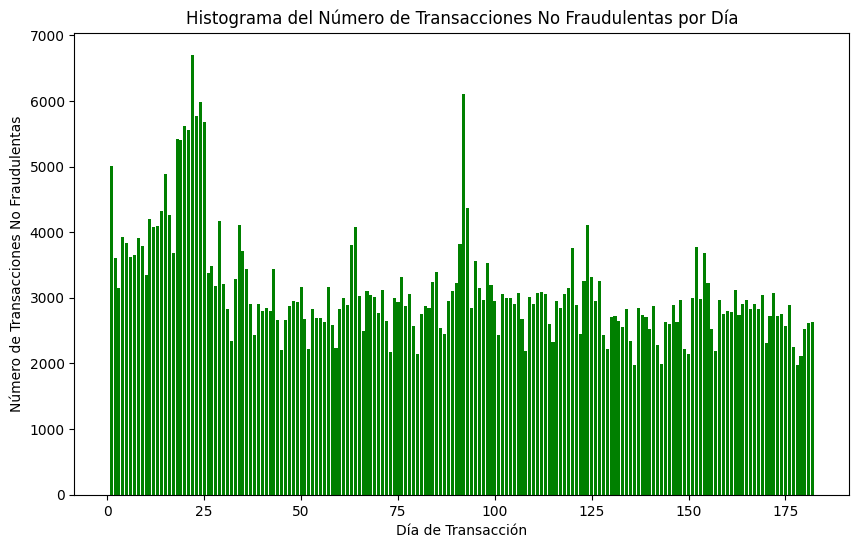

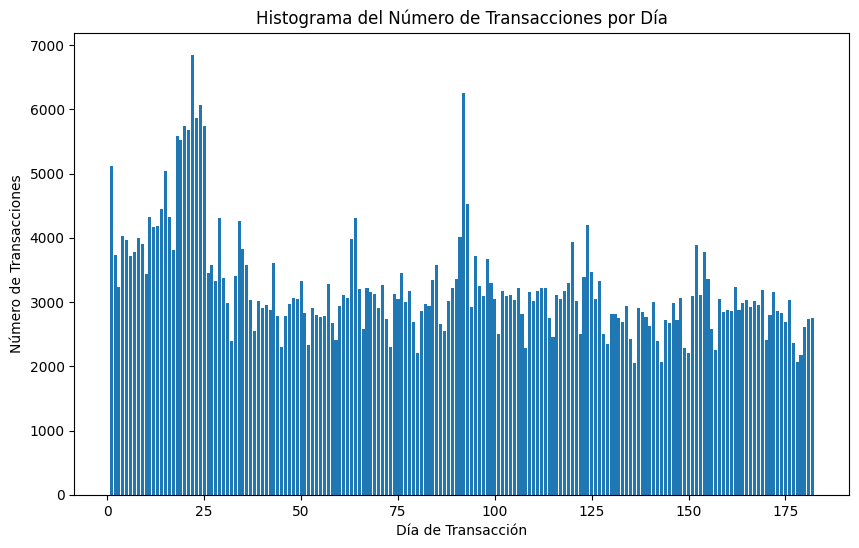

In [10]:
# Filtrar transacciones fraudulentas
fraudulent_transactions = data[data['isFraud'] == 1]
fraudulent_transactions['TransactionDay'] = fraudulent_transactions['TransactionDT'] // (24 * 60 * 60)

# Agrupar por días y contar el número de transacciones fraudulentas
fraudulent_transactions_per_day = fraudulent_transactions.groupby('TransactionDay').size()

# Graficar el número de transacciones fraudulentas por día como histograma horizontal
plt.figure(figsize=(10, 6))
plt.bar(fraudulent_transactions_per_day.index, fraudulent_transactions_per_day.values, color='red')
plt.ylabel('Número de Transacciones Fraudulentas')
plt.xlabel('Día de Transacción')
plt.title('Histograma del Número de Transacciones Fraudulentas por Día')
plt.show()

# Filtrar transacciones no fraudulentas
non_fraudulent_transactions = data[data['isFraud'] == 0]
non_fraudulent_transactions['TransactionDay'] = non_fraudulent_transactions['TransactionDT'] // (24 * 60 * 60)


# Agrupar por días y contar el número de transacciones no fraudulentas
non_fraudulent_transactions_per_day = non_fraudulent_transactions.groupby('TransactionDay').size()

# Graficar el número de transacciones no fraudulentas por día como histograma horizontal
plt.figure(figsize=(10, 6))
plt.bar(non_fraudulent_transactions_per_day.index, non_fraudulent_transactions_per_day.values, color='green')
plt.ylabel('Número de Transacciones No Fraudulentas')
plt.xlabel('Día de Transacción')
plt.title('Histograma del Número de Transacciones No Fraudulentas por Día')
plt.show()


# Agrupar por días y contar el número de transacciones no fraudulentas
normal=data
normal['TransactionDay'] = data['TransactionDT'] // (24 * 60 * 60)
normal_fraudulent_transactions_per_day = normal.groupby('TransactionDay').size()

# Graficar el número de transacciones no fraudulentas por día como histograma horizontal
plt.figure(figsize=(10, 6))
plt.bar(normal_fraudulent_transactions_per_day.index, normal_fraudulent_transactions_per_day.values)
plt.ylabel('Número de Transacciones')
plt.xlabel('Día de Transacción')
plt.title('Histograma del Número de Transacciones por Día')
plt.show()

In [13]:
data.value_counts('card6')

card6
debit              439938
credit             148986
debit or credit        30
charge card            15
Name: count, dtype: int64

In [14]:
print(non_fraudulent_transactions["TransactionAmt"].value_counts().sort_index(ascending=False))
print(fraudulent_transactions["TransactionAmt"].value_counts().sort_index(ascending=False))

TransactionAmt
31937.391    2
6450.970     1
6085.230     1
5543.230     1
5420.000     2
            ..
0.499        1
0.498        1
0.364        1
0.272        1
0.251        1
Name: count, Length: 20560, dtype: int64
TransactionAmt
5191.000    1
4191.000    1
3822.950    1
3260.050    1
3247.160    1
           ..
0.484       1
0.467       6
0.424       4
0.350       1
0.292       5
Name: count, Length: 2515, dtype: int64


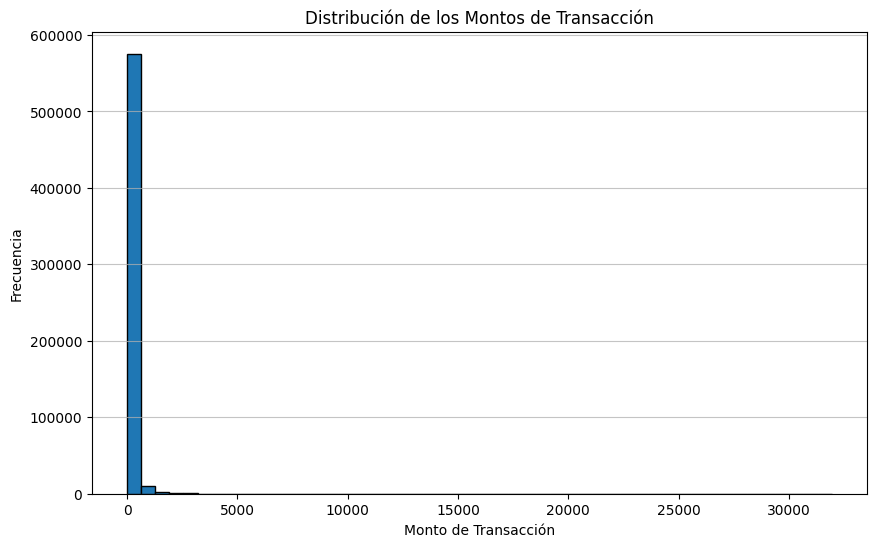

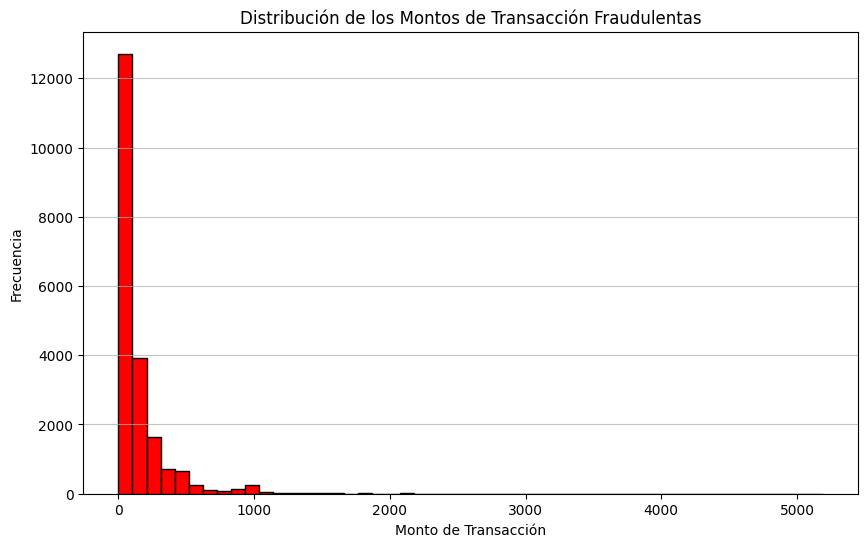

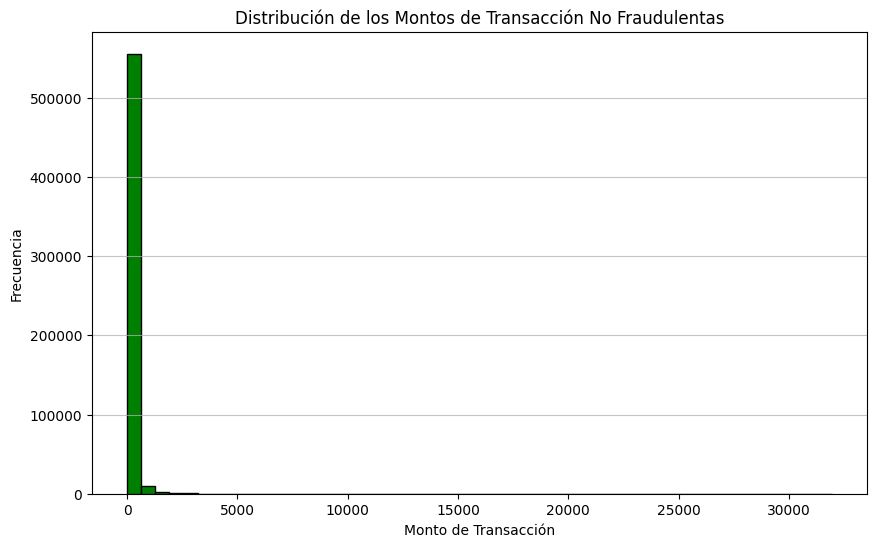

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(data["TransactionAmt"], bins=50, edgecolor='black')
plt.title('Distribución de los Montos de Transacción')
plt.xlabel('Monto de Transacción')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()
# Histograma para transacciones fraudulentas
plt.figure(figsize=(10, 6))
plt.hist(fraudulent_transactions["TransactionAmt"], bins=50, edgecolor='black', color='red')
plt.title('Distribución de los Montos de Transacción Fraudulentas')
plt.xlabel('Monto de Transacción')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Histograma para transacciones no fraudulentas
plt.figure(figsize=(10, 6))
plt.hist(non_fraudulent_transactions["TransactionAmt"], bins=50, edgecolor='black', color='green')
plt.title('Distribución de los Montos de Transacción No Fraudulentas')
plt.xlabel('Monto de Transacción')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [12]:
data.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339',
       'TransactionDay'],
      dtype='object', length=395)

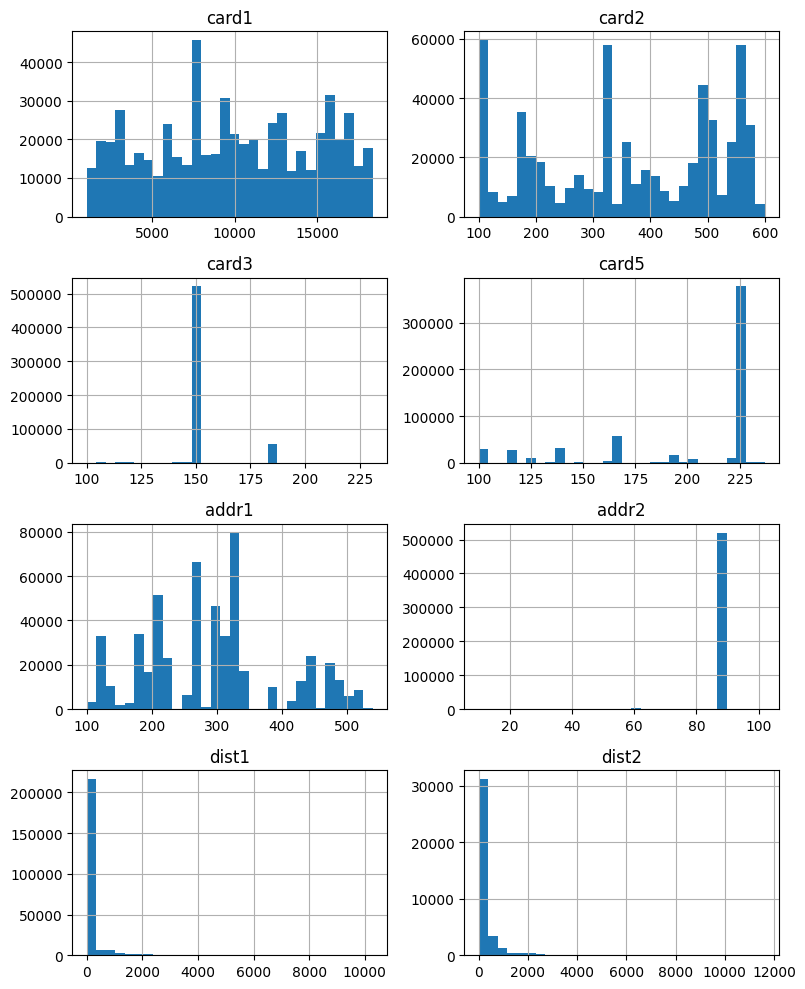

In [13]:
#columnas_a_graficar=data[['TransactionDT','TransactionAmt','card1','card2', 'card3', 'card5','addr1','addr2','dist1','dist2','D1','D2'
              #            ,'D3','D4','D5','D6','D7','D8','D9','D10','D11','D12','D13','D14','D15','isFraud']]
columnas_a_graficar = data[['card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2']]
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(8, 10))
columnas_a_graficar.hist(bins=30, ax=axes)
plt.tight_layout()
plt.show()

In [20]:
columnas_a_graficar=data[['TransactionDT','TransactionAmt','card1','card2', 'card3', 'card5','addr1','addr2','dist1','dist2','D1','D2'
                          ,'D3','D4','D5','D6','D7','D8','D9','D10','D11','D12','D13','D14','D15']]
                       #   ,'C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14','isFraud']]

#plt.figure(figsize=(20,16))
#sns.heatmap(columnas_a_graficar,annot=True,cmap='Blues')

In [28]:
#columnas_a_graficar.dtypes

for col in columnas_a_graficar.columns:
    print(columnas_a_graficar[col].isnull().sum())

0
0
0
8933
1565
4259
65706
65706
352271
552913
1269
280797
262878
168922
309841
517353
551623
515614
515614
76022
279287
525823
528588
528353
89113


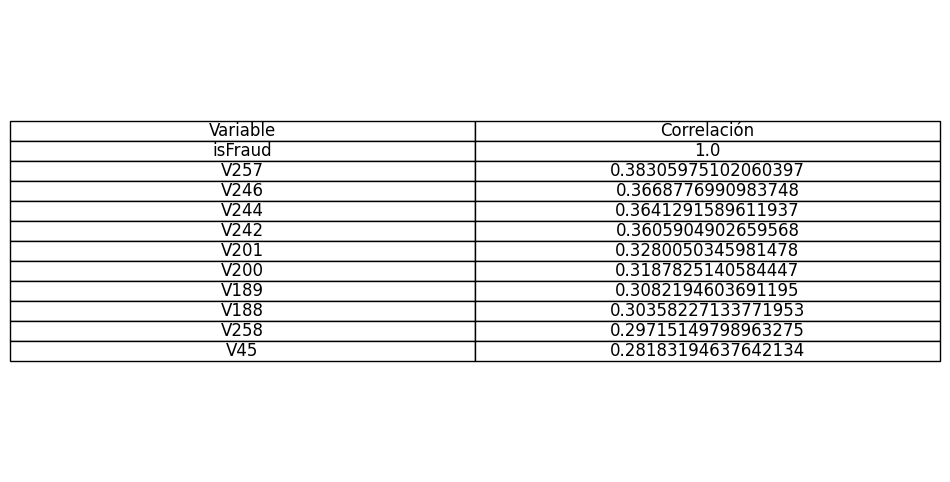

In [43]:
# Crear un DataFrame con las 10 variables con mayor correlación con 'isFraud'
top_10_correlated_df = top_10_correlated.reset_index()
top_10_correlated_df.columns = ['Variable', 'Correlación']

# Mostrar la tabla
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=top_10_correlated_df.values, colLabels=top_10_correlated_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
plt.show()

In [11]:
# Calcular la matriz de correlación
correlation_matrix = data[numeric_columns].corr()

# Seleccionar las 10 variables con mayor correlación con 'isFraud'
top_10_correlated = correlation_matrix['card1'].abs().sort_values(ascending=False).head(11)  # head(11) incluye 'isFraud' en sí misma
#top_10_correlated = top_10_correlated.drop('isFraud')  # Eliminar 'isFraud' de la lista

print("Las 10 variables con mayor correlación con 'card1' son:")
print(top_10_correlated)

Las 10 variables con mayor correlación con 'card1' son:
card1    1.000000
V330     0.146483
V329     0.142539
V324     0.138616
V333     0.136557
V328     0.134419
V323     0.133649
V332     0.133150
V165     0.127711
V322     0.123626
V143     0.123586
Name: card1, dtype: float64


In [19]:
ident

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,3577521,-15.0,145955.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 66.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,F3111 Build/33.3.A.1.97
144229,3577526,-5.0,172059.0,NaN,NaN,1.0,-5.0,NaN,NaN,NaN,...,chrome 55.0 for android,32.0,855x480,match_status:2,T,F,T,F,mobile,A574BL Build/NMF26F
144230,3577529,-20.0,632381.0,NaN,NaN,-1.0,-36.0,NaN,NaN,NaN,...,chrome 65.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,Moto E (4) Plus Build/NMA26.42-152
144231,3577531,-5.0,55528.0,0.0,0.0,0.0,-7.0,NaN,NaN,0.0,...,chrome 66.0,24.0,2560x1600,match_status:2,T,F,T,F,desktop,MacOS


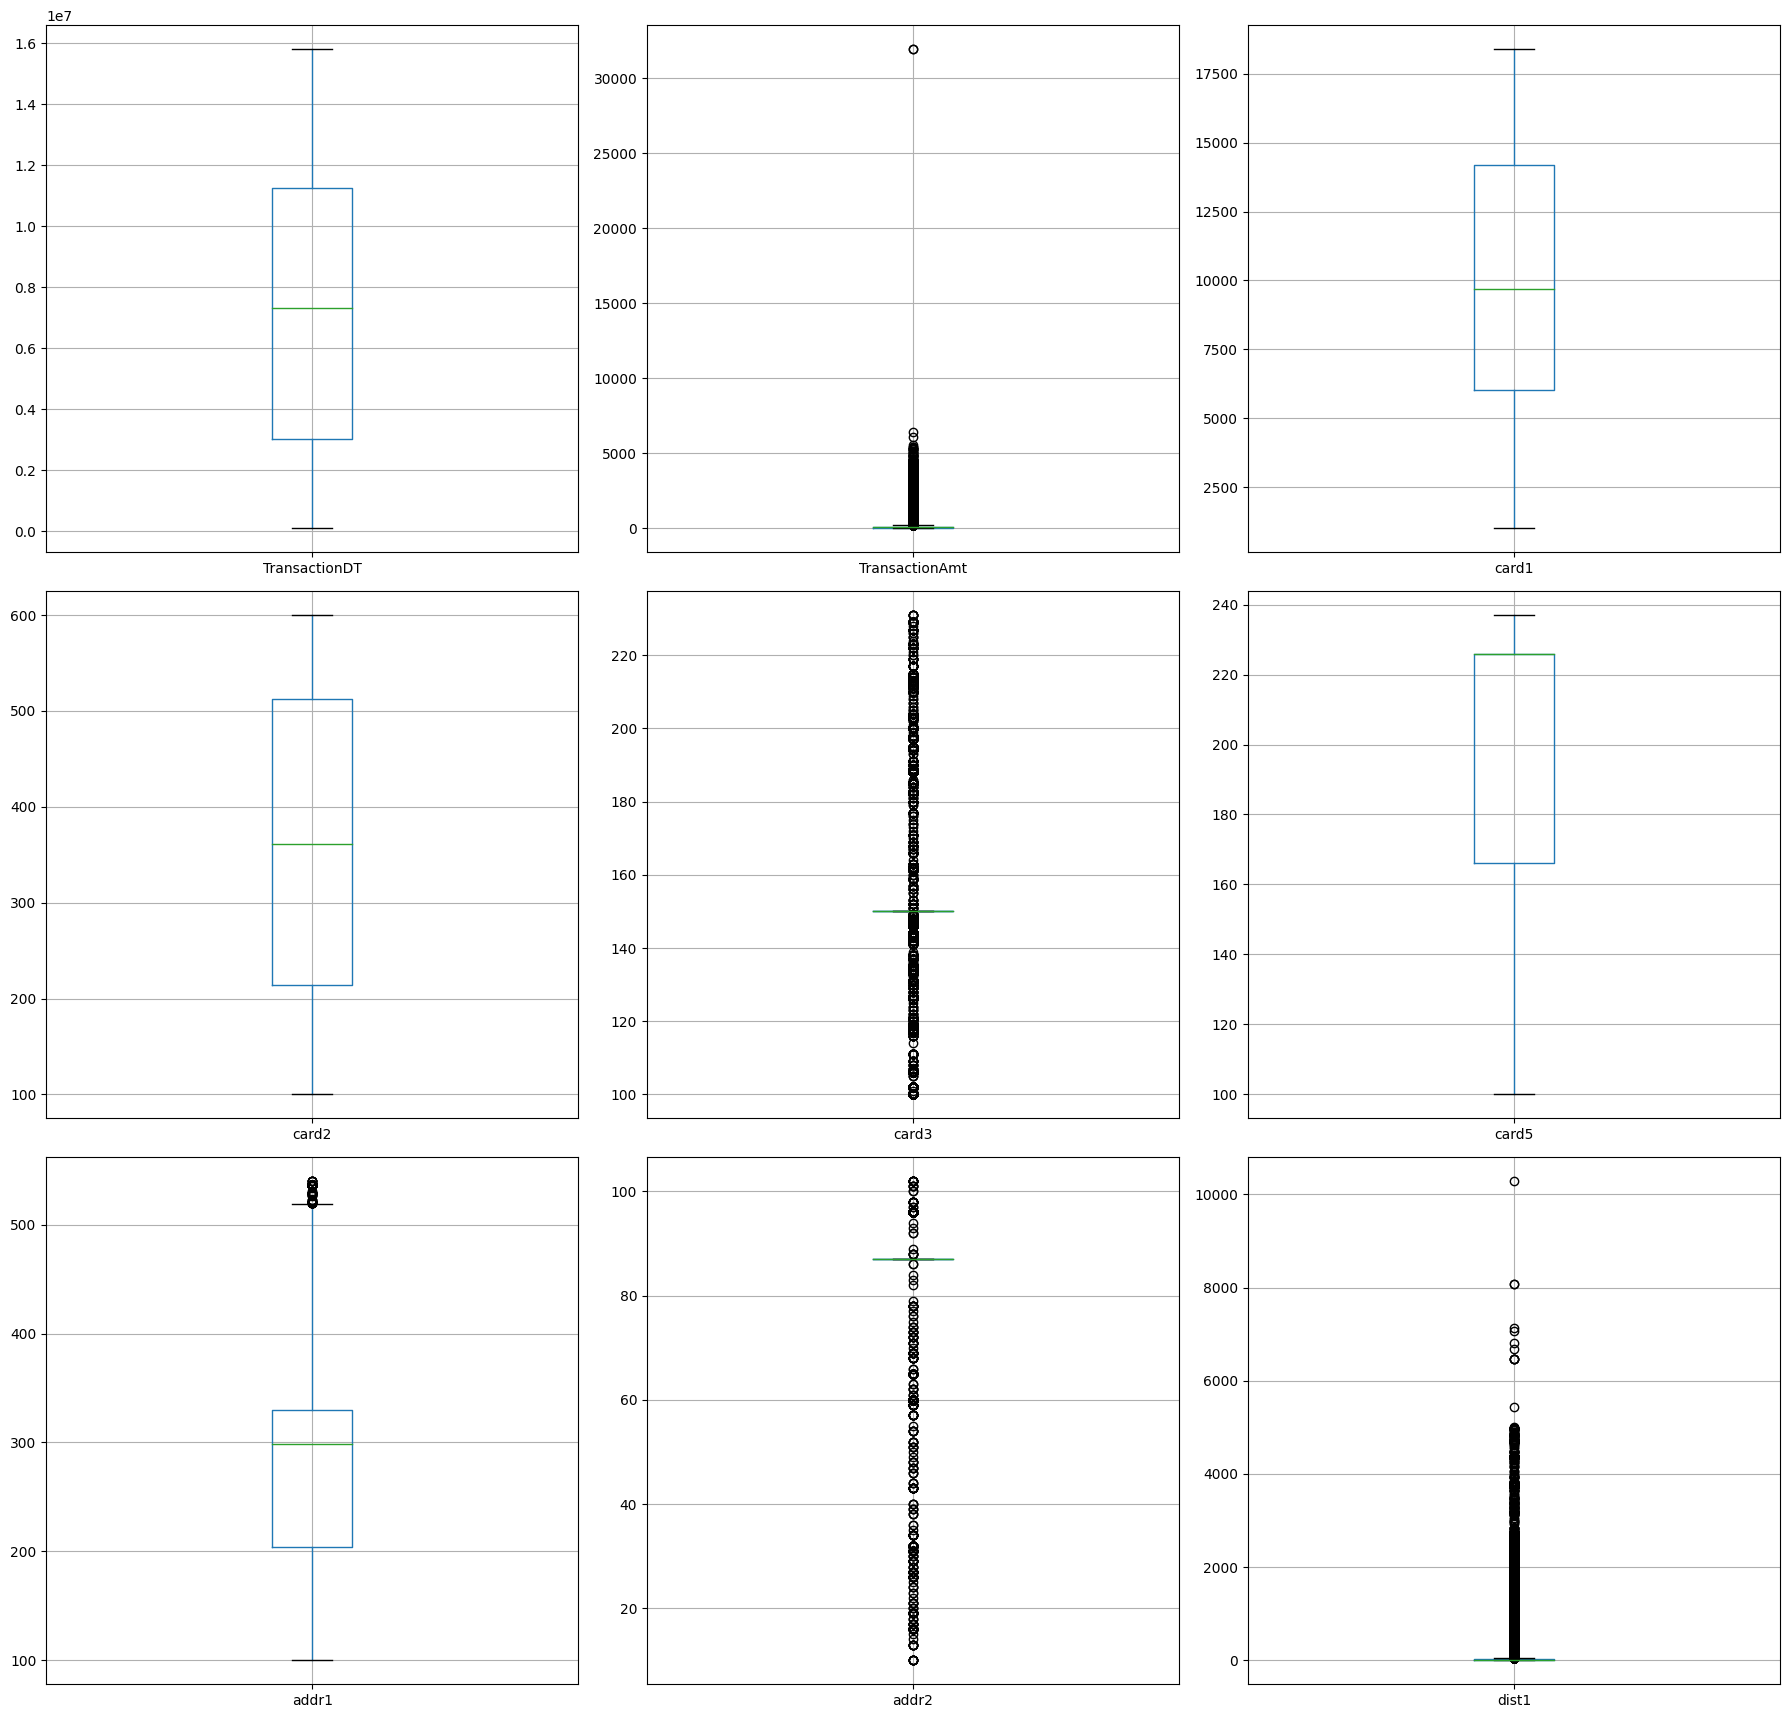

In [65]:
# Crear diagramas de cajas separados para cada columna numérica
numeric_columns = ['TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))

for ax, column in zip(axes.flatten(), numeric_columns):
	data.boxplot(column=column, ax=ax)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


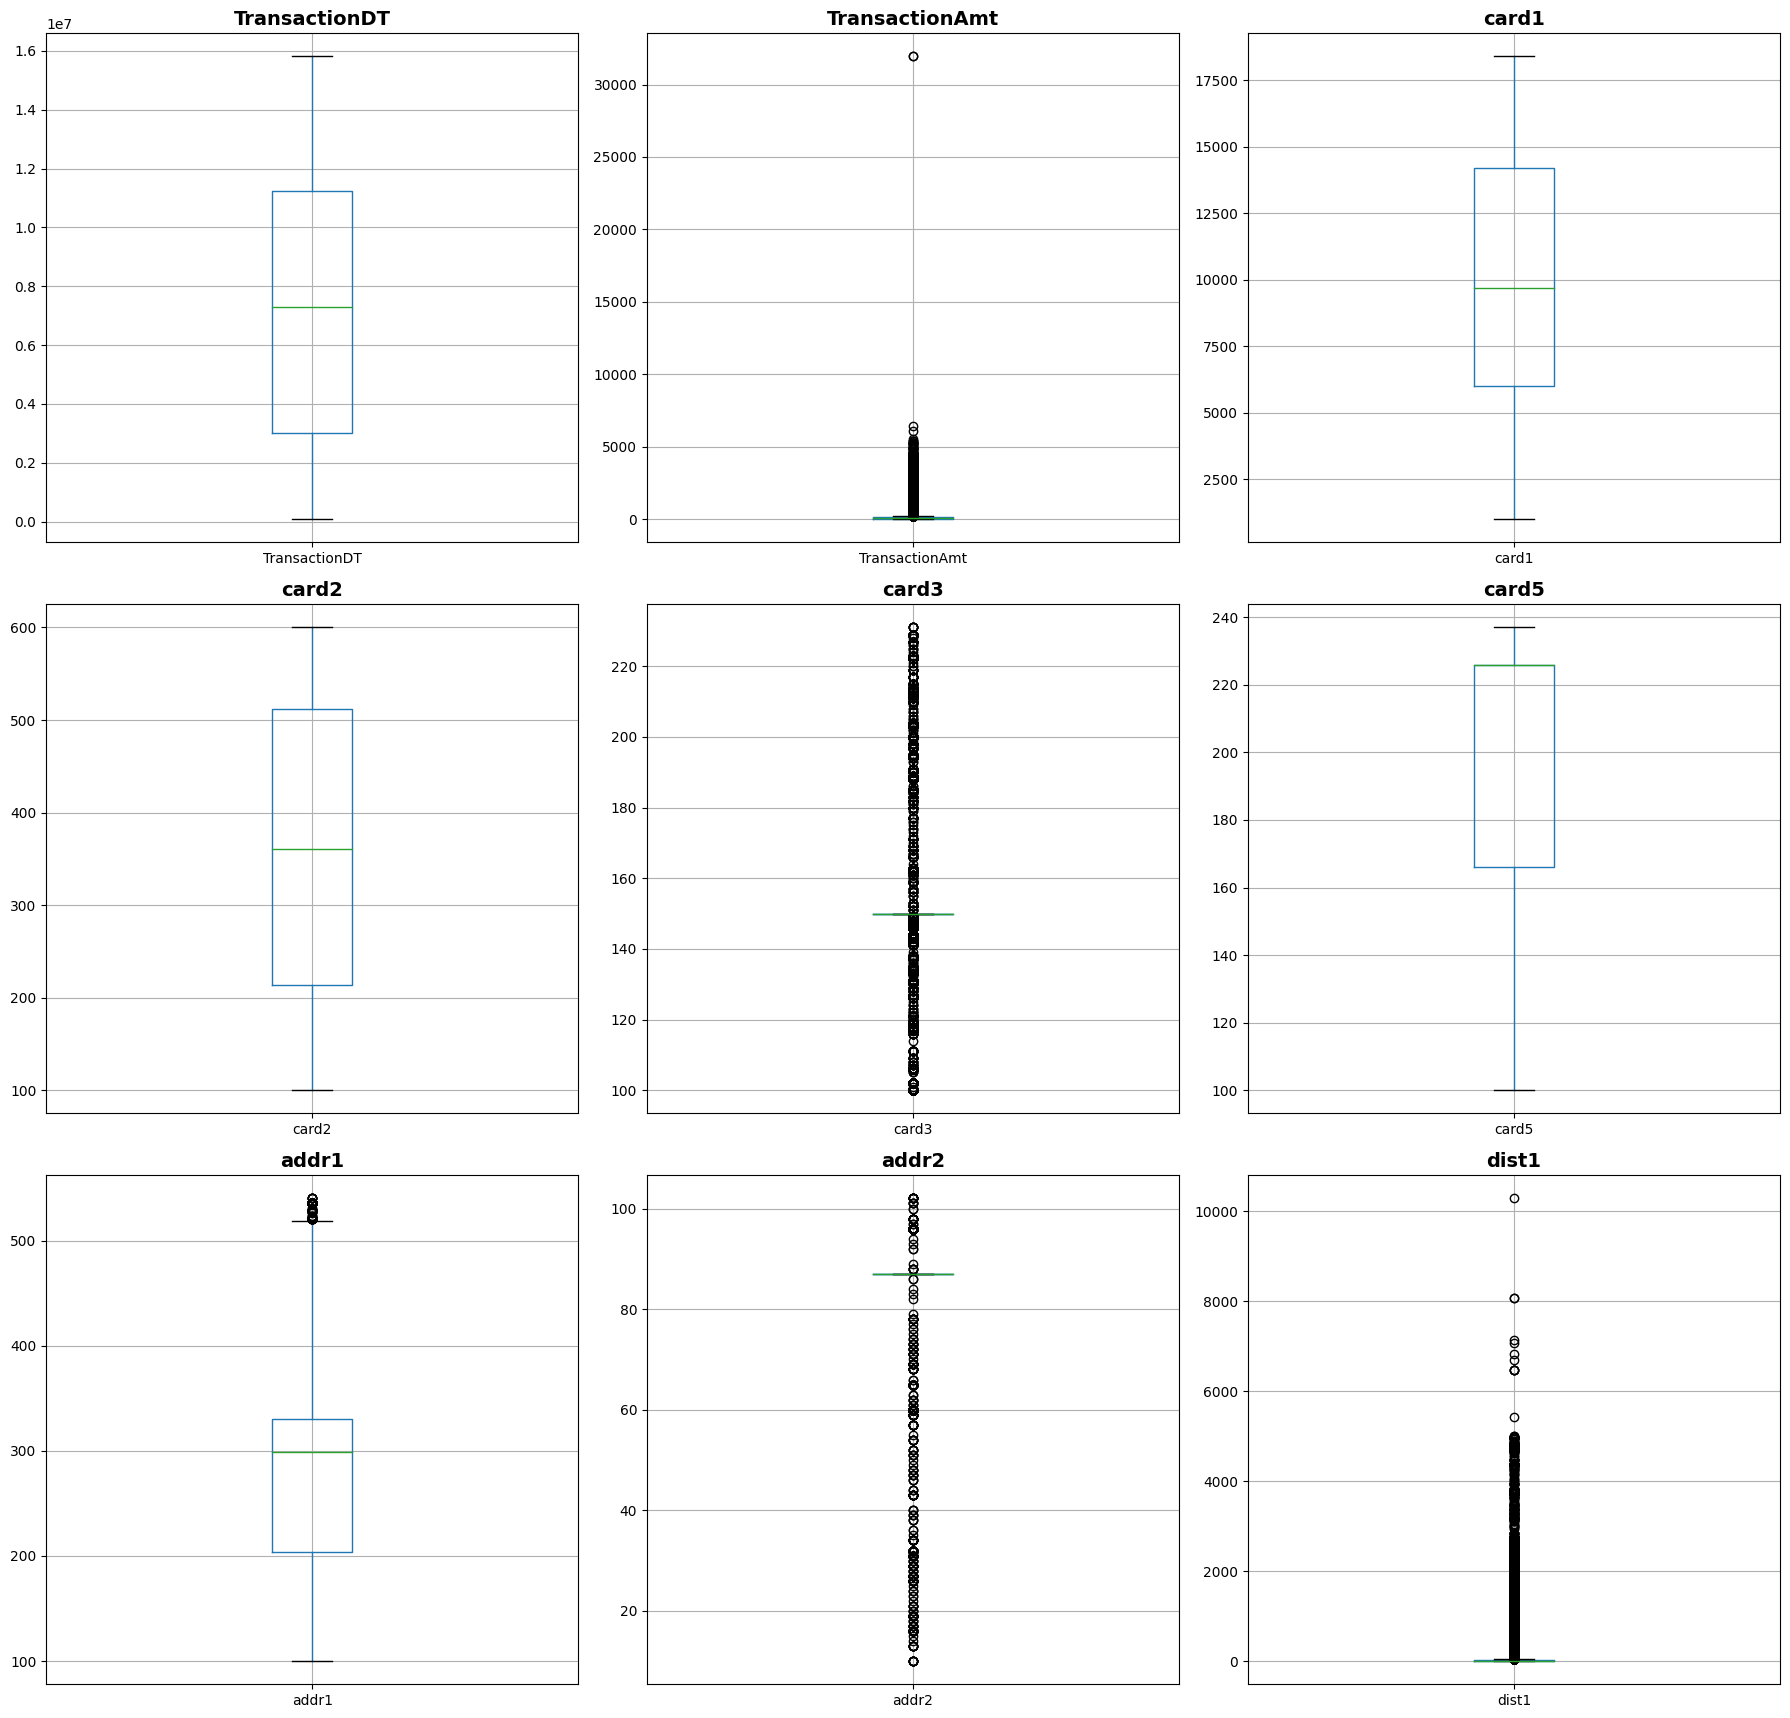

In [66]:
# Crear diagramas de cajas separados para cada columna numérica
numeric_columns = ['TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))

for ax, column in zip(axes.flatten(), numeric_columns):
    data.boxplot(column=column, ax=ax)
    ax.set_title(column, fontsize=14, fontweight='bold')  # Resaltar el título en negrita y aumentar el tamaño de la fuente

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()